# Univariate Exploration of Data

## Bar Charts
A **bar chart** depicts the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level.

- For nominal data, the bars can be ordered by frequency to easily see which category is the most common.
- Ordinal data should not be re-ordered because the inherent ordering of the levels is typically more important to display.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pokemon = pd.read_csv('support-files/03_Univariate/pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


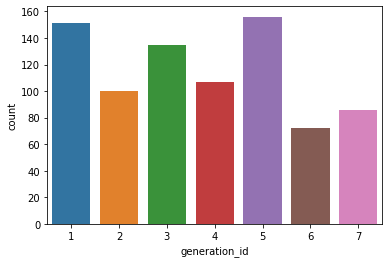

In [3]:
# there is no need for each generation to have its own color
sb.countplot(data = pokemon, x = 'generation_id');

In [4]:
# this is the default color pallete
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [5]:
# if we slice off just the first value,
# our revised chart will use only blue
base_color = sb.color_palette()[0]

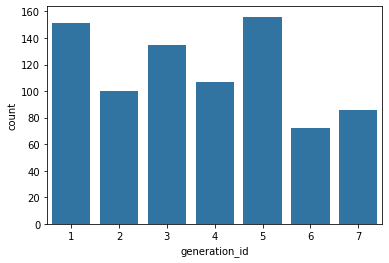

In [6]:
# revised chart without all the colors
# much cleaner!
sb.countplot(data=pokemon, x='generation_id', color=base_color);

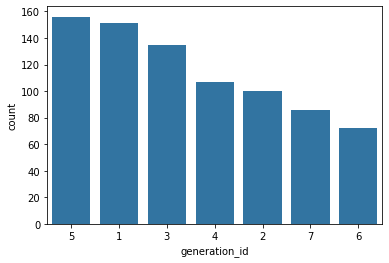

In [7]:
# we can also sort by the number of pokemons
# that were introduced in each generation
# using the order parameter

# first, get the count number programmatically
gen_order = pokemon['generation_id'].value_counts().index

sb.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order);

> Note: Refer to the `CategoricalDtype` to convert the column into an ordered categorical data type. By default, pandas reads in string data as object types, and will plot the bars in the order in which the unique values were seen. By converting the data into an ordered type, the order of categories becomes innate to the feature, and we won't need to specify an "order" parameter each time it's required in a plot.

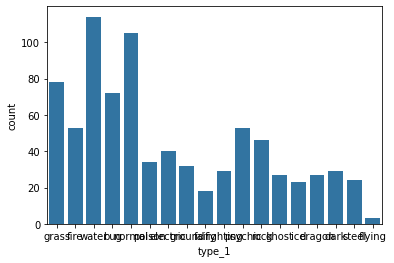

In [8]:
# moving on to pokemon type
# data is mostly unreadable due to overlap
sb.countplot(data=pokemon, x='type_1', color=base_color);

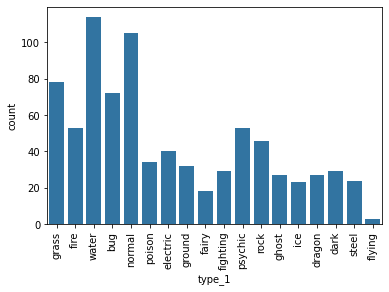

In [9]:
# we can make use of matplotlib's xtics function to rotate
# the category labels
sb.countplot(data=pokemon, x='type_1', color=base_color)
# the labels are turned 90 degrees counterclockwise
plt.xticks(rotation=90);

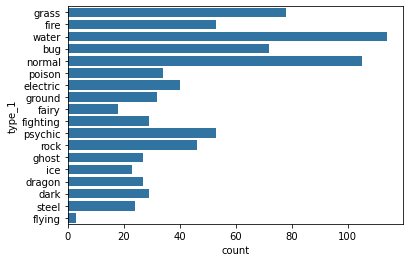

In [10]:
# an alternative approach is to create a horizontal bar chart
# in seabord, this is as simple as changing the x parameter
# into a y
sb.countplot(data=pokemon, y='type_1', color=base_color);

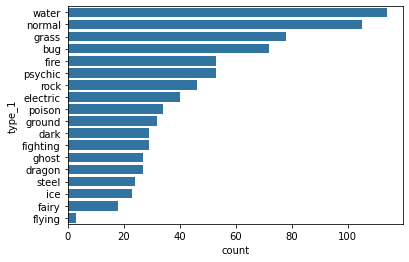

In [11]:
# sorting by type frequency
type_order = pokemon['type_1'].value_counts().index

# water and normal are the most common first types
# taken by pokemon while flying is the least common
sb.countplot(data=pokemon, y='type_1', color=base_color, order=type_order);

## Absolute Vs. Relative Frequency
Changing the count axis to reflect relative proportions makes it easier to see how much each category contributes to the whole.

In [12]:
pokemon.head(1)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65


In [13]:
pkmn_types = pokemon.melt(id_vars=['id','species'],
                         value_vars=['type_1', 'type_2'],
                         var_name='type_level', value_name='type').dropna()

pkmn_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


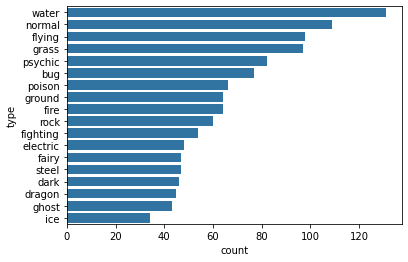

In [14]:
# get the indexes to sort the chart
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

# plot chart and sort by type
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

In [15]:
# what proportion of pokemon have each type?


n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
max_prop

0.1623296158612144

In [16]:
# then, get a list of tick positions